In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
imp0=pd.read_csv("application_data.csv")

In [5]:
imp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
imp0.shape

(307511, 122)

In [7]:
imp0.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
#%percentage of missing values in descending order
imp1=((imp0.isnull().sum())/len(imp0))*100

In [9]:
imp1

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [10]:
imp1.sort_values(ascending=False)

COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_MEDI             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
                              ...    
FLAG_DOCUMENT_16             0.000000
FLAG_DOCUMENT_15             0.000000
FLAG_DOCUMENT_14             0.000000
FLAG_DOCUMENT_20             0.000000
FLAG_DOCUMENT_21             0.000000
Length: 122, dtype: float64

In [11]:
imp1.sort_values(ascending=False).head(40)

COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_MEDI             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_MODE       68.354953
FLOORSMIN_MODE              67.848630
FLOORSMIN_AVG               67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_AVG             66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_MEDI            66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_AVG                59.376738
LANDAREA_MODE               59.376738
BASEMENTAREA_MODE           58.515956
BASEMENTAREA_MEDI           58.515956
BASEMENTAREA_AVG            58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_MODE          55.179164
NONLIVINGAREA_AVG           55.179164
NONLIVINGARE

In [12]:
#remove columns having missing values>50%
imp0.drop(imp0.isnull().sum()[imp0.isnull().sum()>0.5*len(imp0)].index, axis=1, inplace=True)

In [13]:
imp1=((imp0.isnull().sum())/len(imp0))*100

In [14]:
imp1.sort_values(ascending=False).head(20)

FLOORSMAX_MEDI                  49.760822
FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
NAME_TYPE_SUITE                  0.420148
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
dtype: float64

In [15]:
#removing all columns with details of clients apartment etc.(all colums> 45%)
imp0.drop(imp0.isnull().sum()[imp0.isnull().sum()>0.45*len(imp0)].index, axis=1, inplace=True)

In [16]:
imp0.shape

(307511, 73)

In [17]:
imp0['OCCUPATION_TYPE'].value_counts() #important in deciding whether a person gets the loan

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [18]:
#replace missing values in OCCUPATION_TYPE with unknown
imp0['OCCUPATION_TYPE'] = imp0['OCCUPATION_TYPE'].fillna('Unknown')

In [19]:
imp0['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [20]:
imp0['EXT_SOURCE_3'].value_counts()

EXT_SOURCE_3
0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.028275       1
0.858178       1
0.849170       1
0.887664       1
0.864212       1
Name: count, Length: 814, dtype: int64

In [21]:
#replace EXT_SOURCE_3 with mean 
imp0['EXT_SOURCE_3'] = imp0['EXT_SOURCE_3'].fillna(imp0.EXT_SOURCE_3.mean())

In [22]:
imp0['EXT_SOURCE_3'].value_counts()

EXT_SOURCE_3
0.510853    60965
0.746300     1460
0.713631     1315
0.694093     1276
0.670652     1191
            ...  
0.018924        1
0.016541        1
0.017506        1
0.844493        1
0.043227        1
Name: count, Length: 815, dtype: int64

In [26]:
imp1=((imp0.isnull().sum())/len(imp0))*100

In [27]:
imp1.sort_values(ascending=False).head(20)

NAME_TYPE_SUITE             0.420148
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
EXT_SOURCE_2                0.214626
AMT_GOODS_PRICE             0.090403
AMT_ANNUITY                 0.003902
CNT_FAM_MEMBERS             0.000650
DAYS_LAST_PHONE_CHANGE      0.000325
AMT_CREDIT                  0.000000
CNT_CHILDREN                0.000000
FLAG_OWN_REALTY             0.000000
FLAG_OWN_CAR                0.000000
CODE_GENDER                 0.000000
NAME_CONTRACT_TYPE          0.000000
TARGET                      0.000000
SK_ID_CURR                  0.000000
AMT_INCOME_TOTAL            0.000000
DAYS_REGISTRATION           0.000000
dtype: float64

In [28]:
imp0['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [29]:
imp0['NAME_TYPE_SUITE'] = imp0['NAME_TYPE_SUITE'].fillna('Unknown')

In [30]:
imp0['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Unknown              1292
Other_A               866
Group of people       271
Name: count, dtype: int64

In [31]:
imp0.shape

(307511, 73)

In [32]:
#dropping some unnecessary columns
columns_to_drop =['NAME_CONTRACT_TYPE','FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
              'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
                     'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
                            'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
                                   'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                                   'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_YEAR']

imp0 = imp0.drop(columns_to_drop, axis=1)

In [34]:
imp0.shape

(307511, 36)

In [35]:
imp0.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OCCUPATION_TYPE                   0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION        0
LIVE_REGION_NOT_WORK_REGION       0
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY      

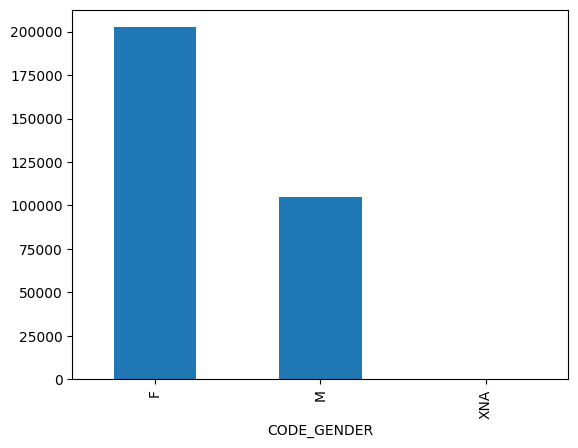

In [36]:
imp0['CODE_GENDER'].value_counts().plot.bar()
plt.show()

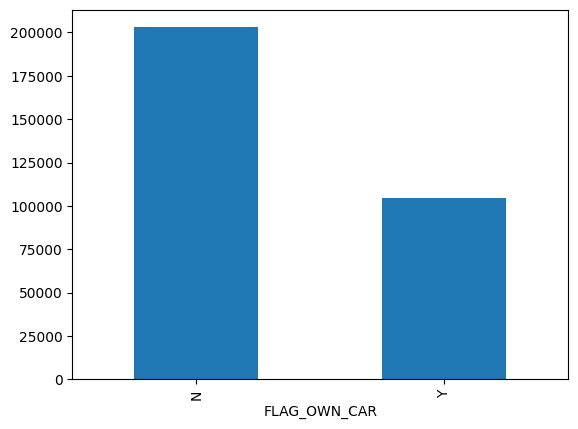

In [37]:
imp0['FLAG_OWN_CAR'].value_counts().plot.bar()
plt.show()

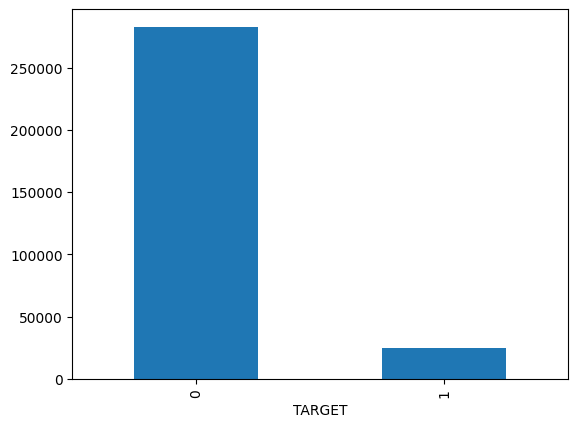

In [38]:
imp0['TARGET'].value_counts().plot.bar()
plt.show()

In [40]:
imp0['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [41]:
#round off the days to years

In [42]:
imp0['DAYS_BIRTH'].value_counts()

DAYS_BIRTH
-13749    43
-13481    42
-10020    41
-18248    41
-15771    40
          ..
-24958     1
-25048     1
-24980     1
-25061     1
-25045     1
Name: count, Length: 17460, dtype: int64

In [43]:
imp0['DAYS_BIRTH']=-round(imp0['DAYS_BIRTH']/365,0)

In [44]:
imp0['DAYS_BIRTH'].head(20)

0     26.0
1     46.0
2     52.0
3     52.0
4     55.0
5     46.0
6     38.0
7     52.0
8     55.0
9     40.0
10    28.0
11    56.0
12    37.0
13    39.0
14    40.0
15    24.0
16    35.0
17    27.0
18    49.0
19    31.0
Name: DAYS_BIRTH, dtype: float64

In [45]:
#do the same with all the days columns

In [46]:
imp0['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-11471         1
-12878         1
-10573         1
-12990         1
-14184         1
Name: count, Length: 12574, dtype: int64

In [47]:
imp0['DAYS_EMPLOYED']=-round(imp0['DAYS_EMPLOYED']/365,0)
imp0['DAYS_EMPLOYED'].head(20)

0        2.0
1        3.0
2        1.0
3        8.0
4        8.0
5        4.0
6        9.0
7        1.0
8    -1001.0
9        6.0
10       2.0
11   -1001.0
12       7.0
13       8.0
14       1.0
15       3.0
16       4.0
17       1.0
18      21.0
19       6.0
Name: DAYS_EMPLOYED, dtype: float64

In [48]:
imp0 = imp0.drop(imp0[imp0['DAYS_EMPLOYED'] == -1001.0].index)

In [49]:
imp0['DAYS_REGISTRATION'].value_counts()

DAYS_REGISTRATION
-1.0        91
-6.0        84
-2.0        82
-7.0        81
-4.0        78
            ..
-15794.0     1
-13615.0     1
-14047.0     1
-19183.0     1
-15106.0     1
Name: count, Length: 14419, dtype: int64

In [50]:
imp0['DAYS_REGISTRATION']=-round(imp0['DAYS_REGISTRATION']/365,0)
imp0['DAYS_REGISTRATION'].head(20)

0     10.0
1      3.0
2     12.0
3     27.0
4     12.0
5     14.0
6      3.0
7     13.0
9     40.0
10    12.0
12     1.0
13     2.0
14     2.0
15    10.0
16    18.0
17    11.0
18    24.0
19     3.0
20     1.0
21     6.0
Name: DAYS_REGISTRATION, dtype: float64

In [51]:
imp0['DAYS_ID_PUBLISH'].value_counts()

DAYS_ID_PUBLISH
-4166    112
-4032    112
-4053    111
-4214    110
-4081    110
        ... 
-6235      1
-6136      1
-6259      1
-5854      1
-6211      1
Name: count, Length: 6140, dtype: int64

In [52]:
imp0['DAYS_ID_PUBLISH']=-round(imp0['DAYS_ID_PUBLISH']/365,0)
imp0['DAYS_ID_PUBLISH'].head(20)

0      6.0
1      1.0
2      7.0
3      7.0
4      9.0
5      1.0
6      2.0
7      7.0
9     11.0
10     2.0
12     9.0
13    13.0
14     6.0
15     4.0
16    11.0
17     7.0
18     3.0
19    11.0
20     5.0
21     6.0
Name: DAYS_ID_PUBLISH, dtype: float64

In [53]:
#Rename columns containing "DAYS" to "YEARS"
def rename_days_to_years(imp0):
    columns_= ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]
    new_columns= [col.replace("DAYS", "YEARS") for col in columns_]
    imp0= imp0.rename(columns=dict(zip(columns_, new_columns)))
    return imp0

In [54]:
imp0 = rename_days_to_years(imp0)

In [55]:
imp0.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')

In [56]:
#deriving new columns.

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']


imp0['AMT_INCOME_RANGE']=pd.cut(imp0['AMT_INCOME_TOTAL'],bins,labels=slot)

In [57]:
#creating bins for AMT_Credit

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

imp0['AMT_CREDIT_RANGE']=pd.cut(imp0['AMT_CREDIT'],bins=bins,labels=slots)

In [58]:
target0_imp0=imp0.loc[imp0["TARGET"]==0]
target1_imp0=imp0.loc[imp0["TARGET"]==1]

In [59]:
len(target0_imp0),len(target1_imp0)

(230302, 21835)

In [60]:
#univariate analysis

#resuable function.
# Count plotting in logarithmic scale

def uniplot(imp0,col,title,hue =None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(imp0[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = imp0, x= col, order=imp0[col].value_counts().index,hue = hue,palette='magma')

    plt.show()

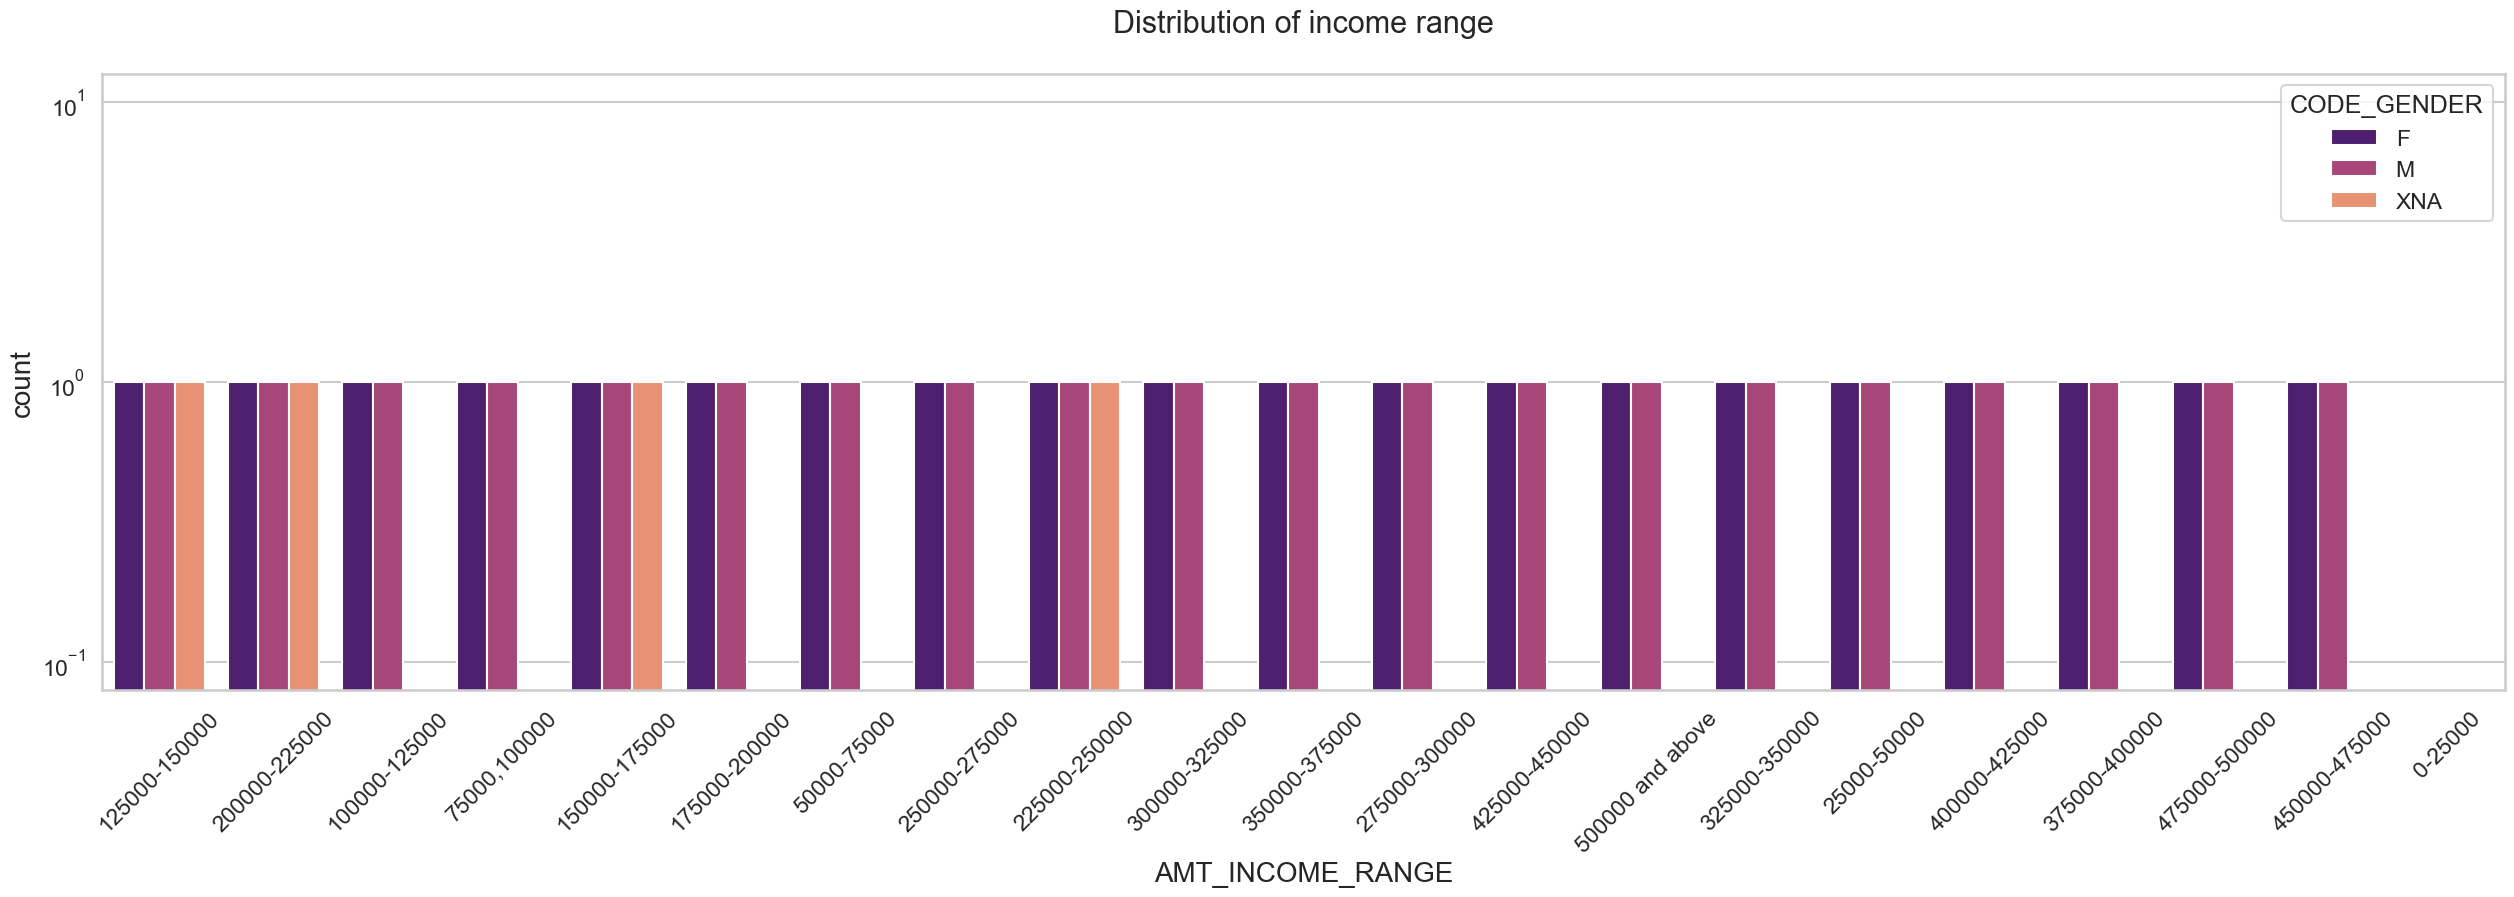

In [61]:
#plot
uniplot(target0_imp0,"AMT_INCOME_RANGE","Distribution of income range","CODE_GENDER")

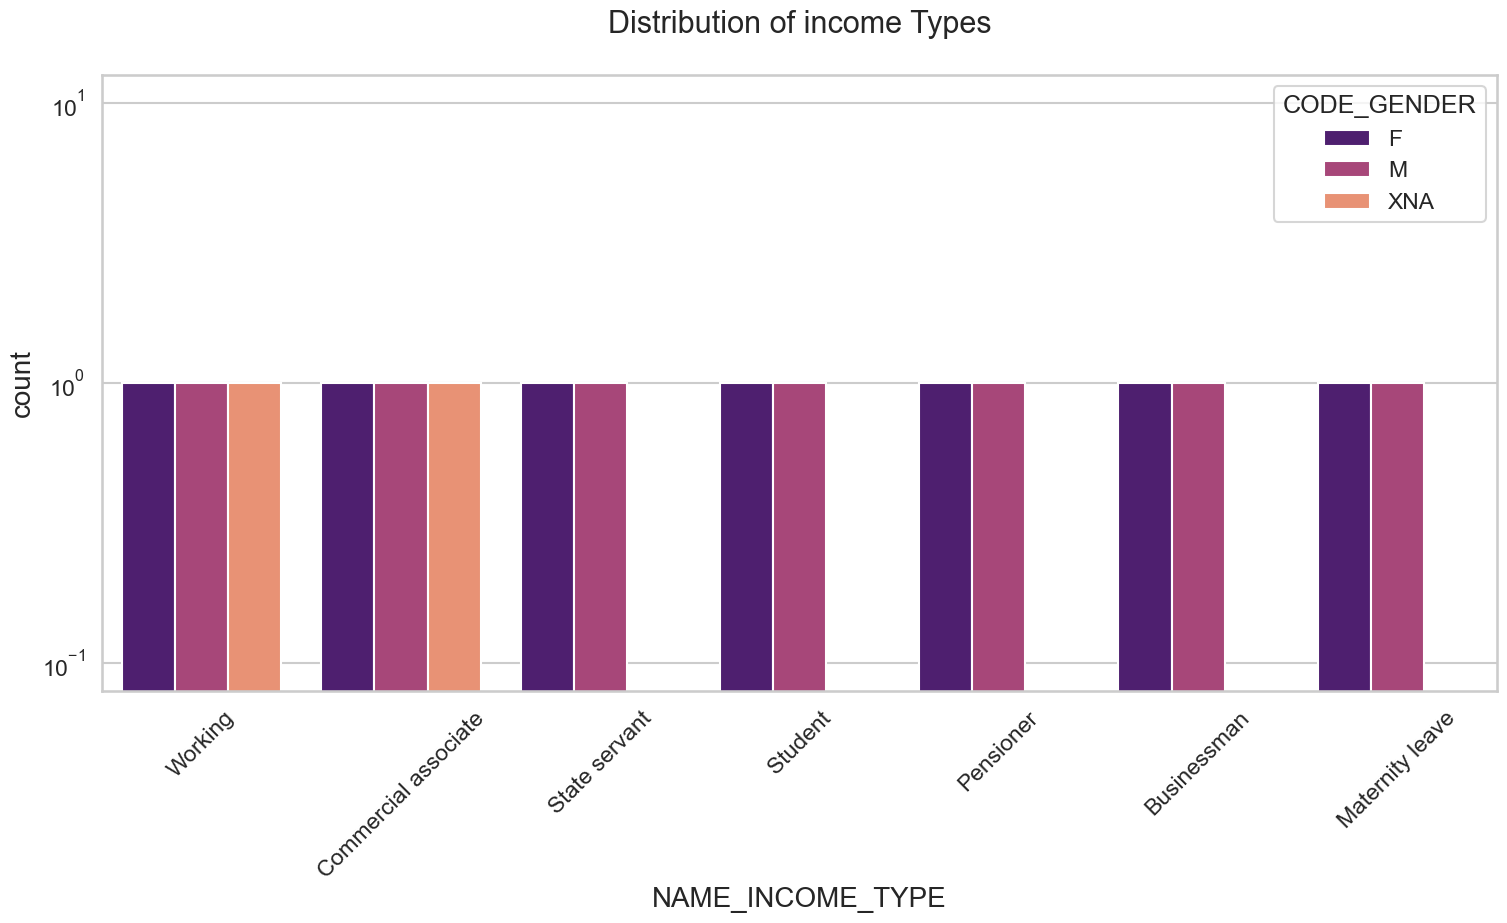

In [62]:
uniplot(target0_imp0,"NAME_INCOME_TYPE","Distribution of income Types","CODE_GENDER")

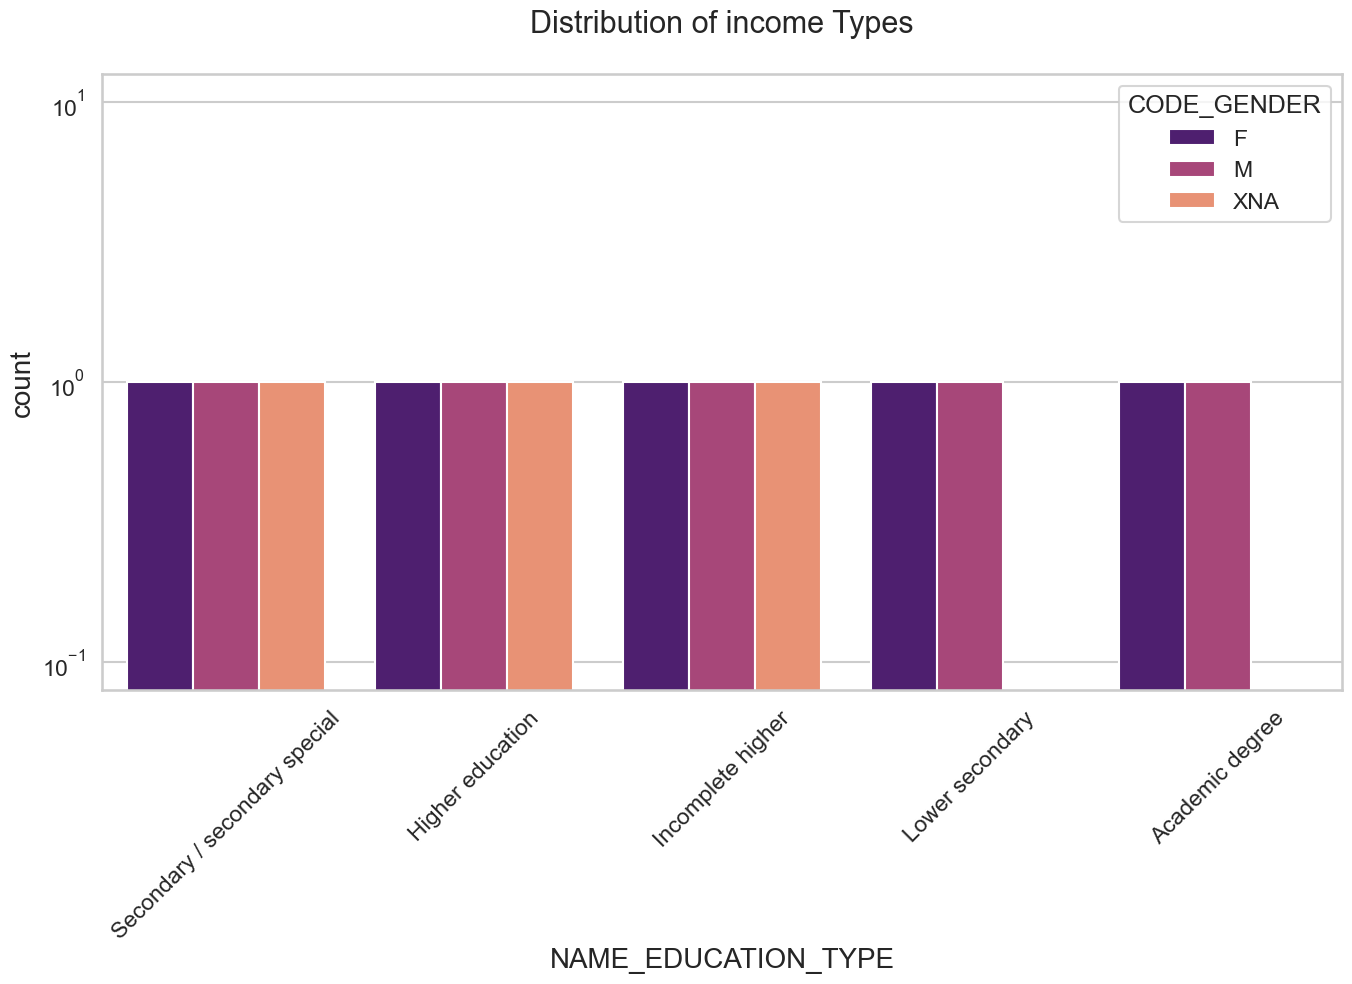

In [63]:
uniplot(target0_imp0,"NAME_EDUCATION_TYPE","Distribution of income Types","CODE_GENDER")

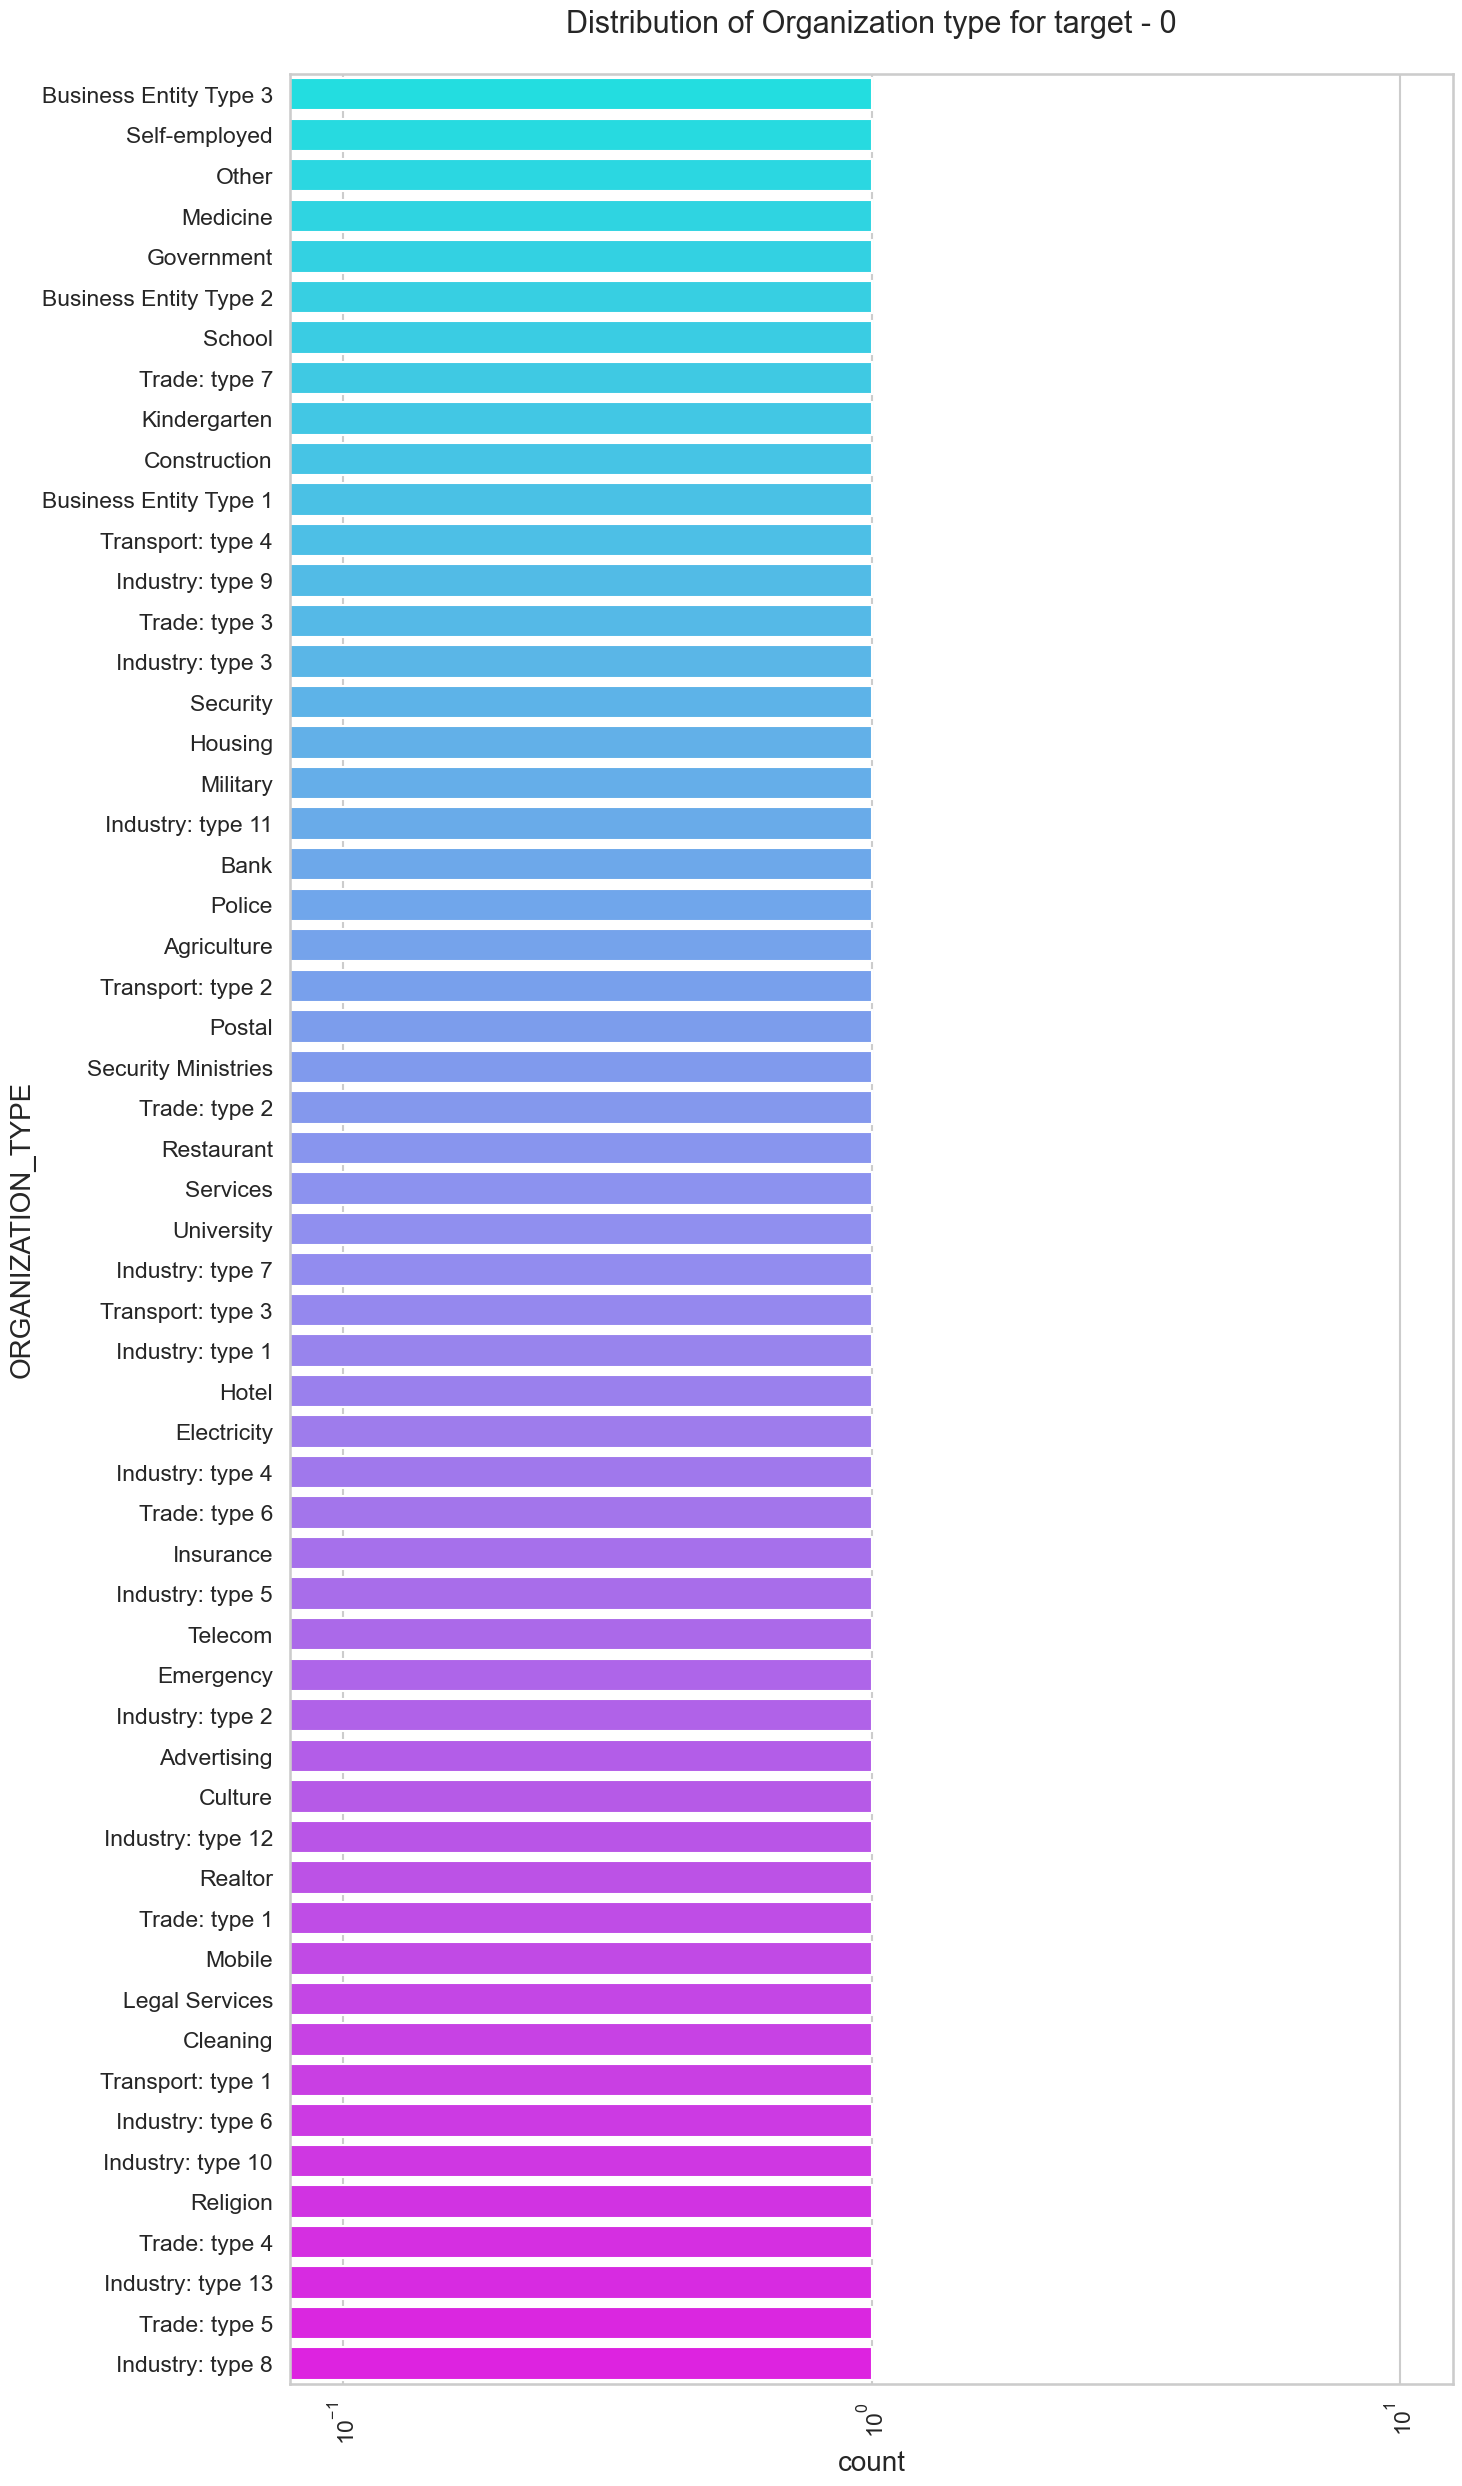

In [64]:
# dsitribution of organisation

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_imp0,y='ORGANIZATION_TYPE',order=target0_imp0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

In [66]:
#categorical and numerical columns

In [67]:
cat=imp0.select_dtypes(include=['object']).columns

In [68]:
print(cat)

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')


Plotting CODE_GENDER


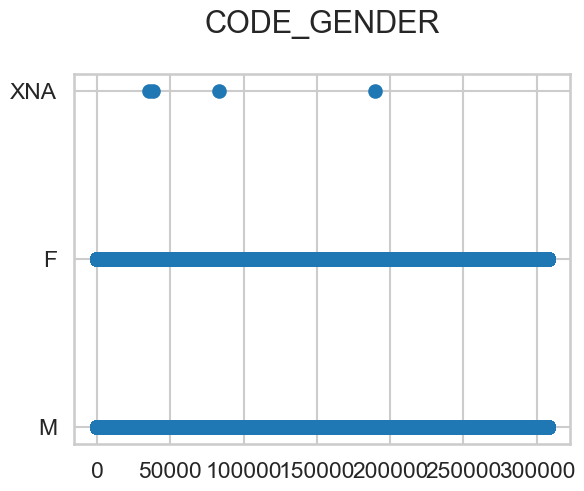

Plotting FLAG_OWN_CAR


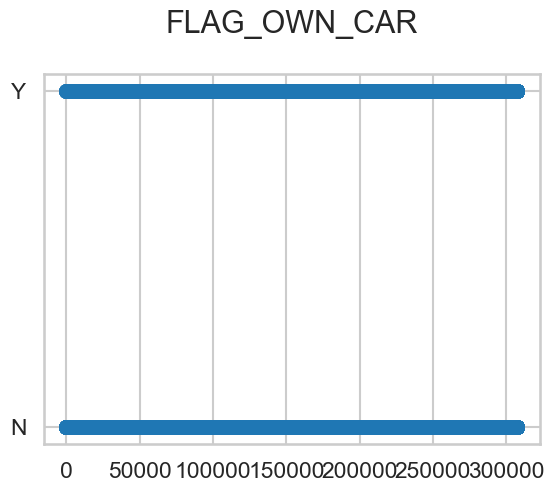

Plotting FLAG_OWN_REALTY


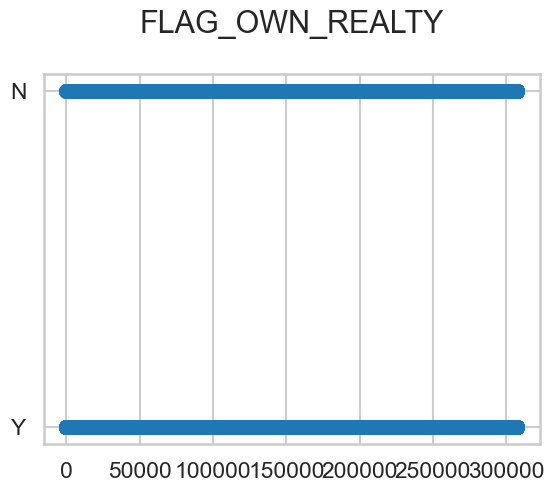

Plotting NAME_TYPE_SUITE


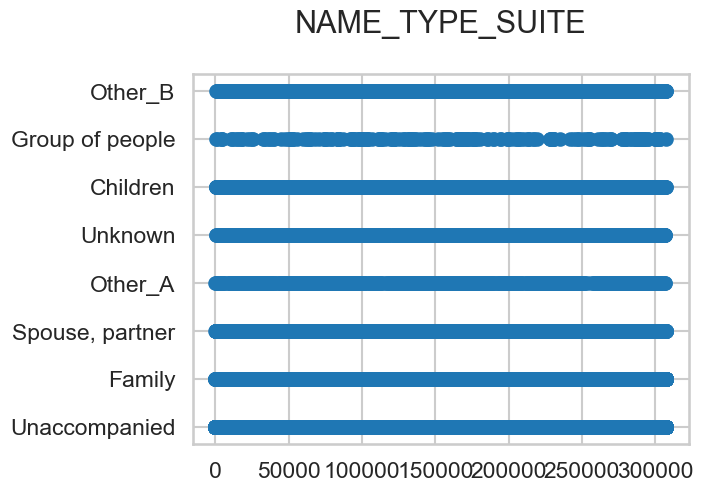

Plotting NAME_INCOME_TYPE


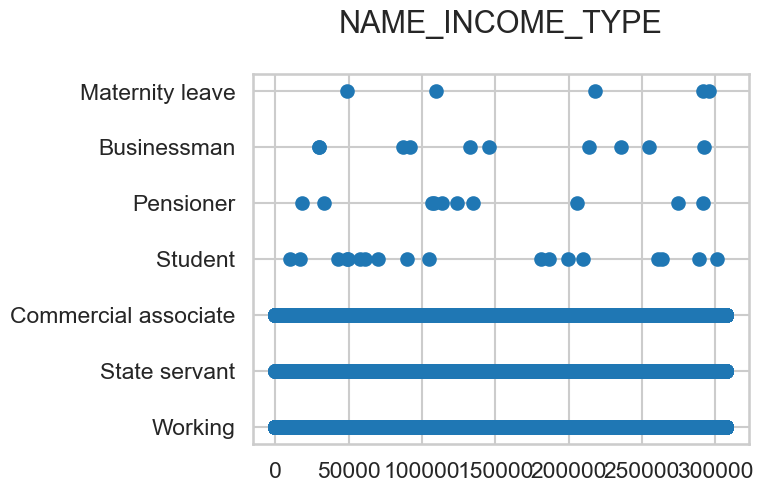

Plotting NAME_EDUCATION_TYPE


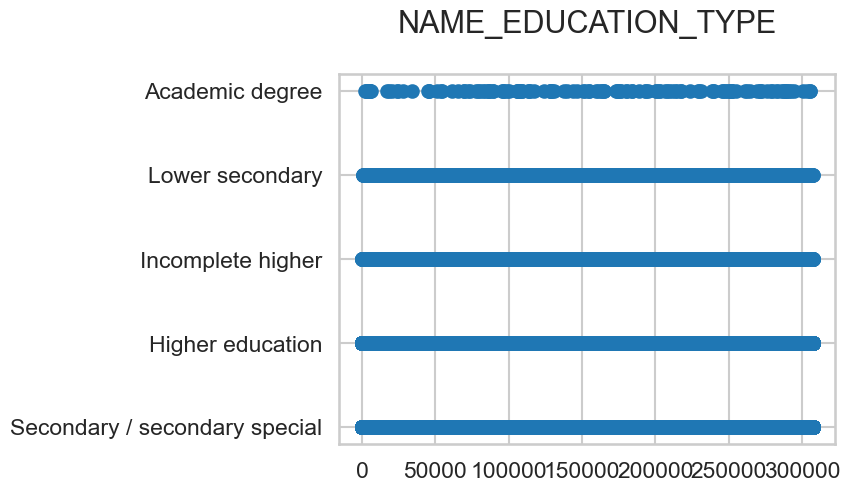

Plotting NAME_FAMILY_STATUS


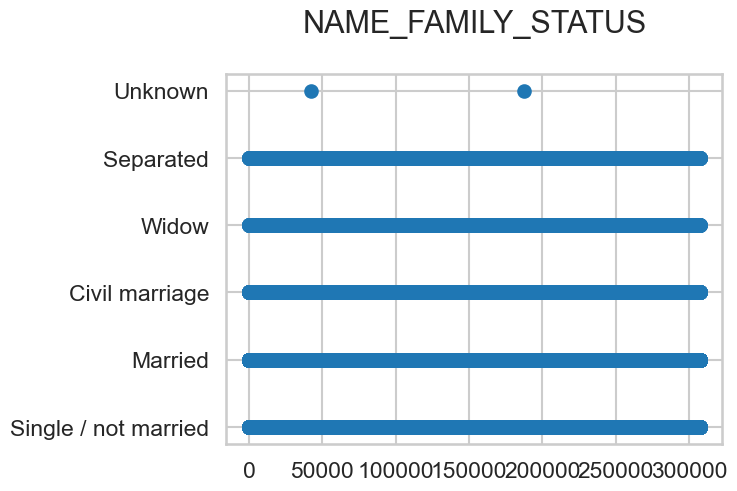

Plotting NAME_HOUSING_TYPE


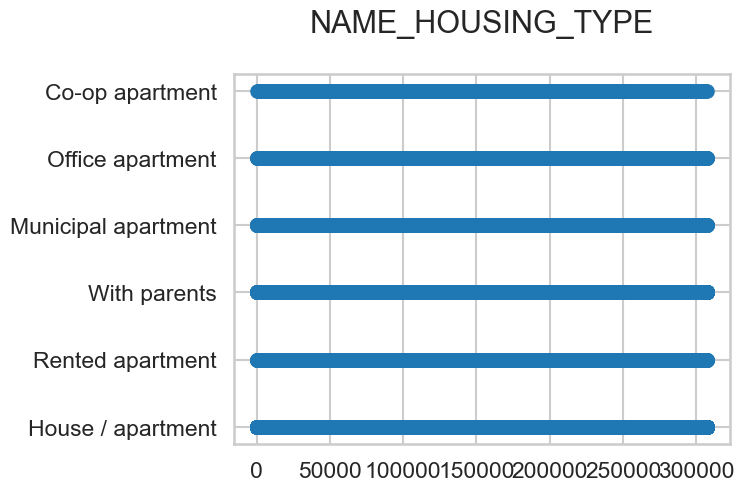

Plotting OCCUPATION_TYPE


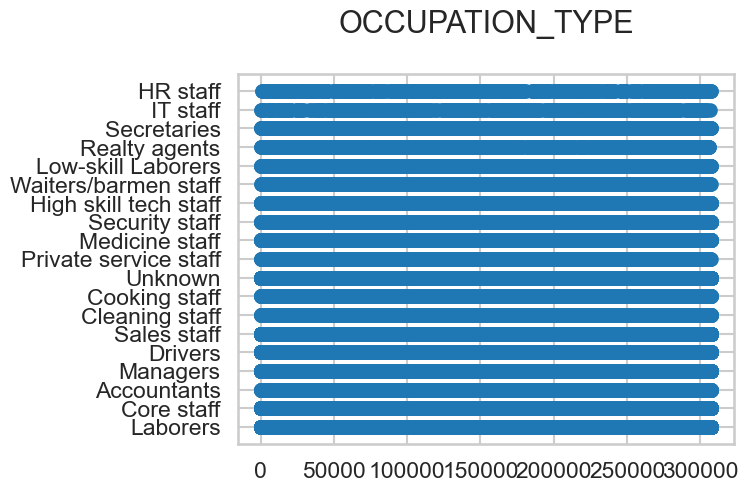

Plotting WEEKDAY_APPR_PROCESS_START


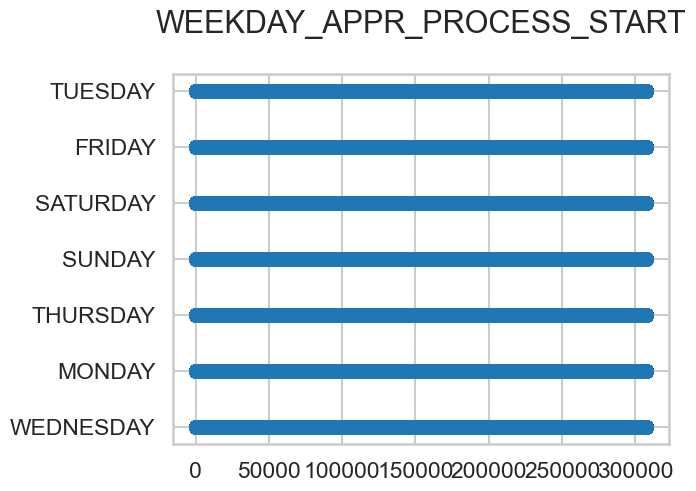

Plotting ORGANIZATION_TYPE


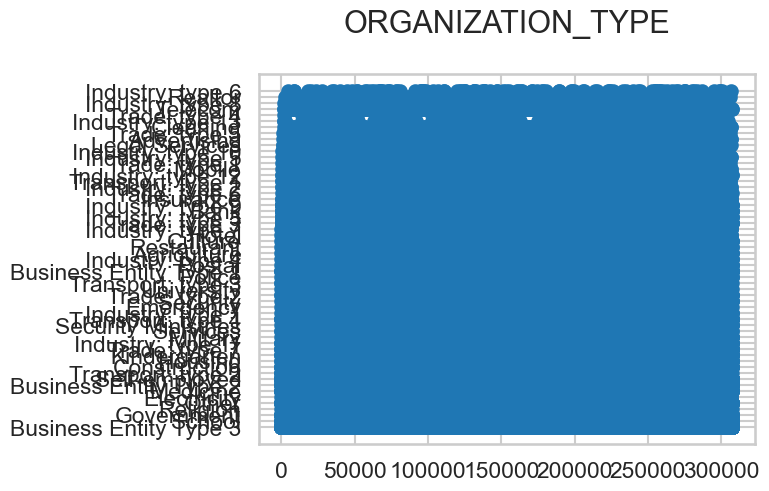

In [69]:
for col in cat:
    print('Plotting',col)
    plt.scatter(imp0.index,imp0[col])
    plt.title(col)
    plt.show()

In [70]:
#Finding out the correlation coefficient table for the numerical columns of the application DataFrame imp0

In [71]:
imp2 = imp0.select_dtypes(include=[np.number])

In [72]:
imp2.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,YEARS_BIRTH,YEARS_EMPLOYED,...,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
SK_ID_CURR,1.000000,-0.001408,-0.001036,-0.002353,-0.000601,-0.001601,-0.000211,0.000536,0.001482,0.000082,...,0.003367,-0.002604,-0.001407,0.000415,0.002011,0.000957,0.000078,0.001897,0.000044,0.002422
TARGET,-0.001408,1.000000,0.007741,-0.007332,-0.040659,-0.020040,-0.050342,-0.040640,-0.065772,-0.074979,...,-0.001738,0.041977,0.043384,0.024599,-0.170531,-0.157654,0.011279,0.035868,0.011222,0.034198
CNT_CHILDREN,-0.001036,0.007741,1.000000,-0.003541,-0.017720,-0.006002,-0.021533,-0.030726,-0.236627,-0.061124,...,-0.008808,-0.003079,0.009639,0.018404,-0.025503,-0.014112,0.020297,0.003643,0.019932,0.002050
AMT_INCOME_TOTAL,-0.002353,-0.007332,-0.003541,1.000000,0.143098,0.175384,0.145951,0.072045,0.021124,0.013255,...,0.052731,-0.003156,-0.010458,-0.005966,0.057610,-0.021179,-0.014086,-0.013201,-0.013983,-0.012817
AMT_CREDIT,-0.000601,-0.040659,-0.017720,0.143098,1.000000,0.761307,0.986451,0.103175,0.157386,0.091424,...,0.050840,-0.038797,-0.040360,-0.016025,0.139584,0.057357,-0.002814,-0.024381,-0.002747,-0.026444
AMT_ANNUITY,-0.001601,-0.020040,-0.006002,0.175384,0.761307,1.000000,0.765739,0.119900,0.092555,0.053926,...,0.070874,-0.019198,-0.029027,-0.014146,0.127489,0.043960,-0.015431,-0.023997,-0.015169,-0.025001
AMT_GOODS_PRICE,-0.000211,-0.050342,-0.021533,0.145951,0.986451,0.765739,1.000000,0.106951,0.152184,0.093503,...,0.051320,-0.038678,-0.041436,-0.017083,0.147820,0.060728,-0.003037,-0.025400,-0.003004,-0.026992
REGION_POPULATION_RELATIVE,0.000536,-0.040640,-0.030726,0.072045,0.103175,0.119900,0.106951,1.000000,0.044215,-0.004233,...,0.089183,-0.055625,-0.051363,-0.018137,0.207026,-0.005543,-0.012844,0.005203,-0.012331,0.000574
YEARS_BIRTH,0.001482,-0.065772,-0.236627,0.021124,0.157386,0.092555,0.152184,0.044215,1.000000,0.351878,...,-0.012832,-0.165090,-0.113456,-0.030928,0.150893,0.158225,-0.017810,-0.017042,-0.017390,-0.017677
YEARS_EMPLOYED,0.000082,-0.074979,-0.061124,0.013255,0.091424,0.053926,0.093503,-0.004233,0.351878,1.000000,...,-0.061987,-0.114022,-0.128387,-0.075402,0.093107,0.116584,0.001919,-0.009472,0.001966,-0.011091


In [73]:
#Getting the top 10 correlations

In [74]:
correlation=imp2.corr().abs()
correlation=correlation.unstack().sort_values(ascending=False)
correlation=correlation.dropna()
correlation=correlation[correlation!=1.0]
print(correlation)

OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.998473
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998473
AMT_CREDIT                AMT_GOODS_PRICE             0.986451
AMT_GOODS_PRICE           AMT_CREDIT                  0.986451
DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE    0.862386
                                                        ...   
SK_ID_CURR                YEARS_EMPLOYED              0.000082
OBS_30_CNT_SOCIAL_CIRCLE  SK_ID_CURR                  0.000078
SK_ID_CURR                OBS_30_CNT_SOCIAL_CIRCLE    0.000078
                          OBS_60_CNT_SOCIAL_CIRCLE    0.000044
OBS_60_CNT_SOCIAL_CIRCLE  SK_ID_CURR                  0.000044
Length: 600, dtype: float64


In [85]:
#Read the previous application csv file
inp0=pd.read_csv('previous_application.csv')

In [86]:
merge=imp0.merge(inp0,left_on='SK_ID_CURR',right_on='SK_ID_CURR',how='inner')

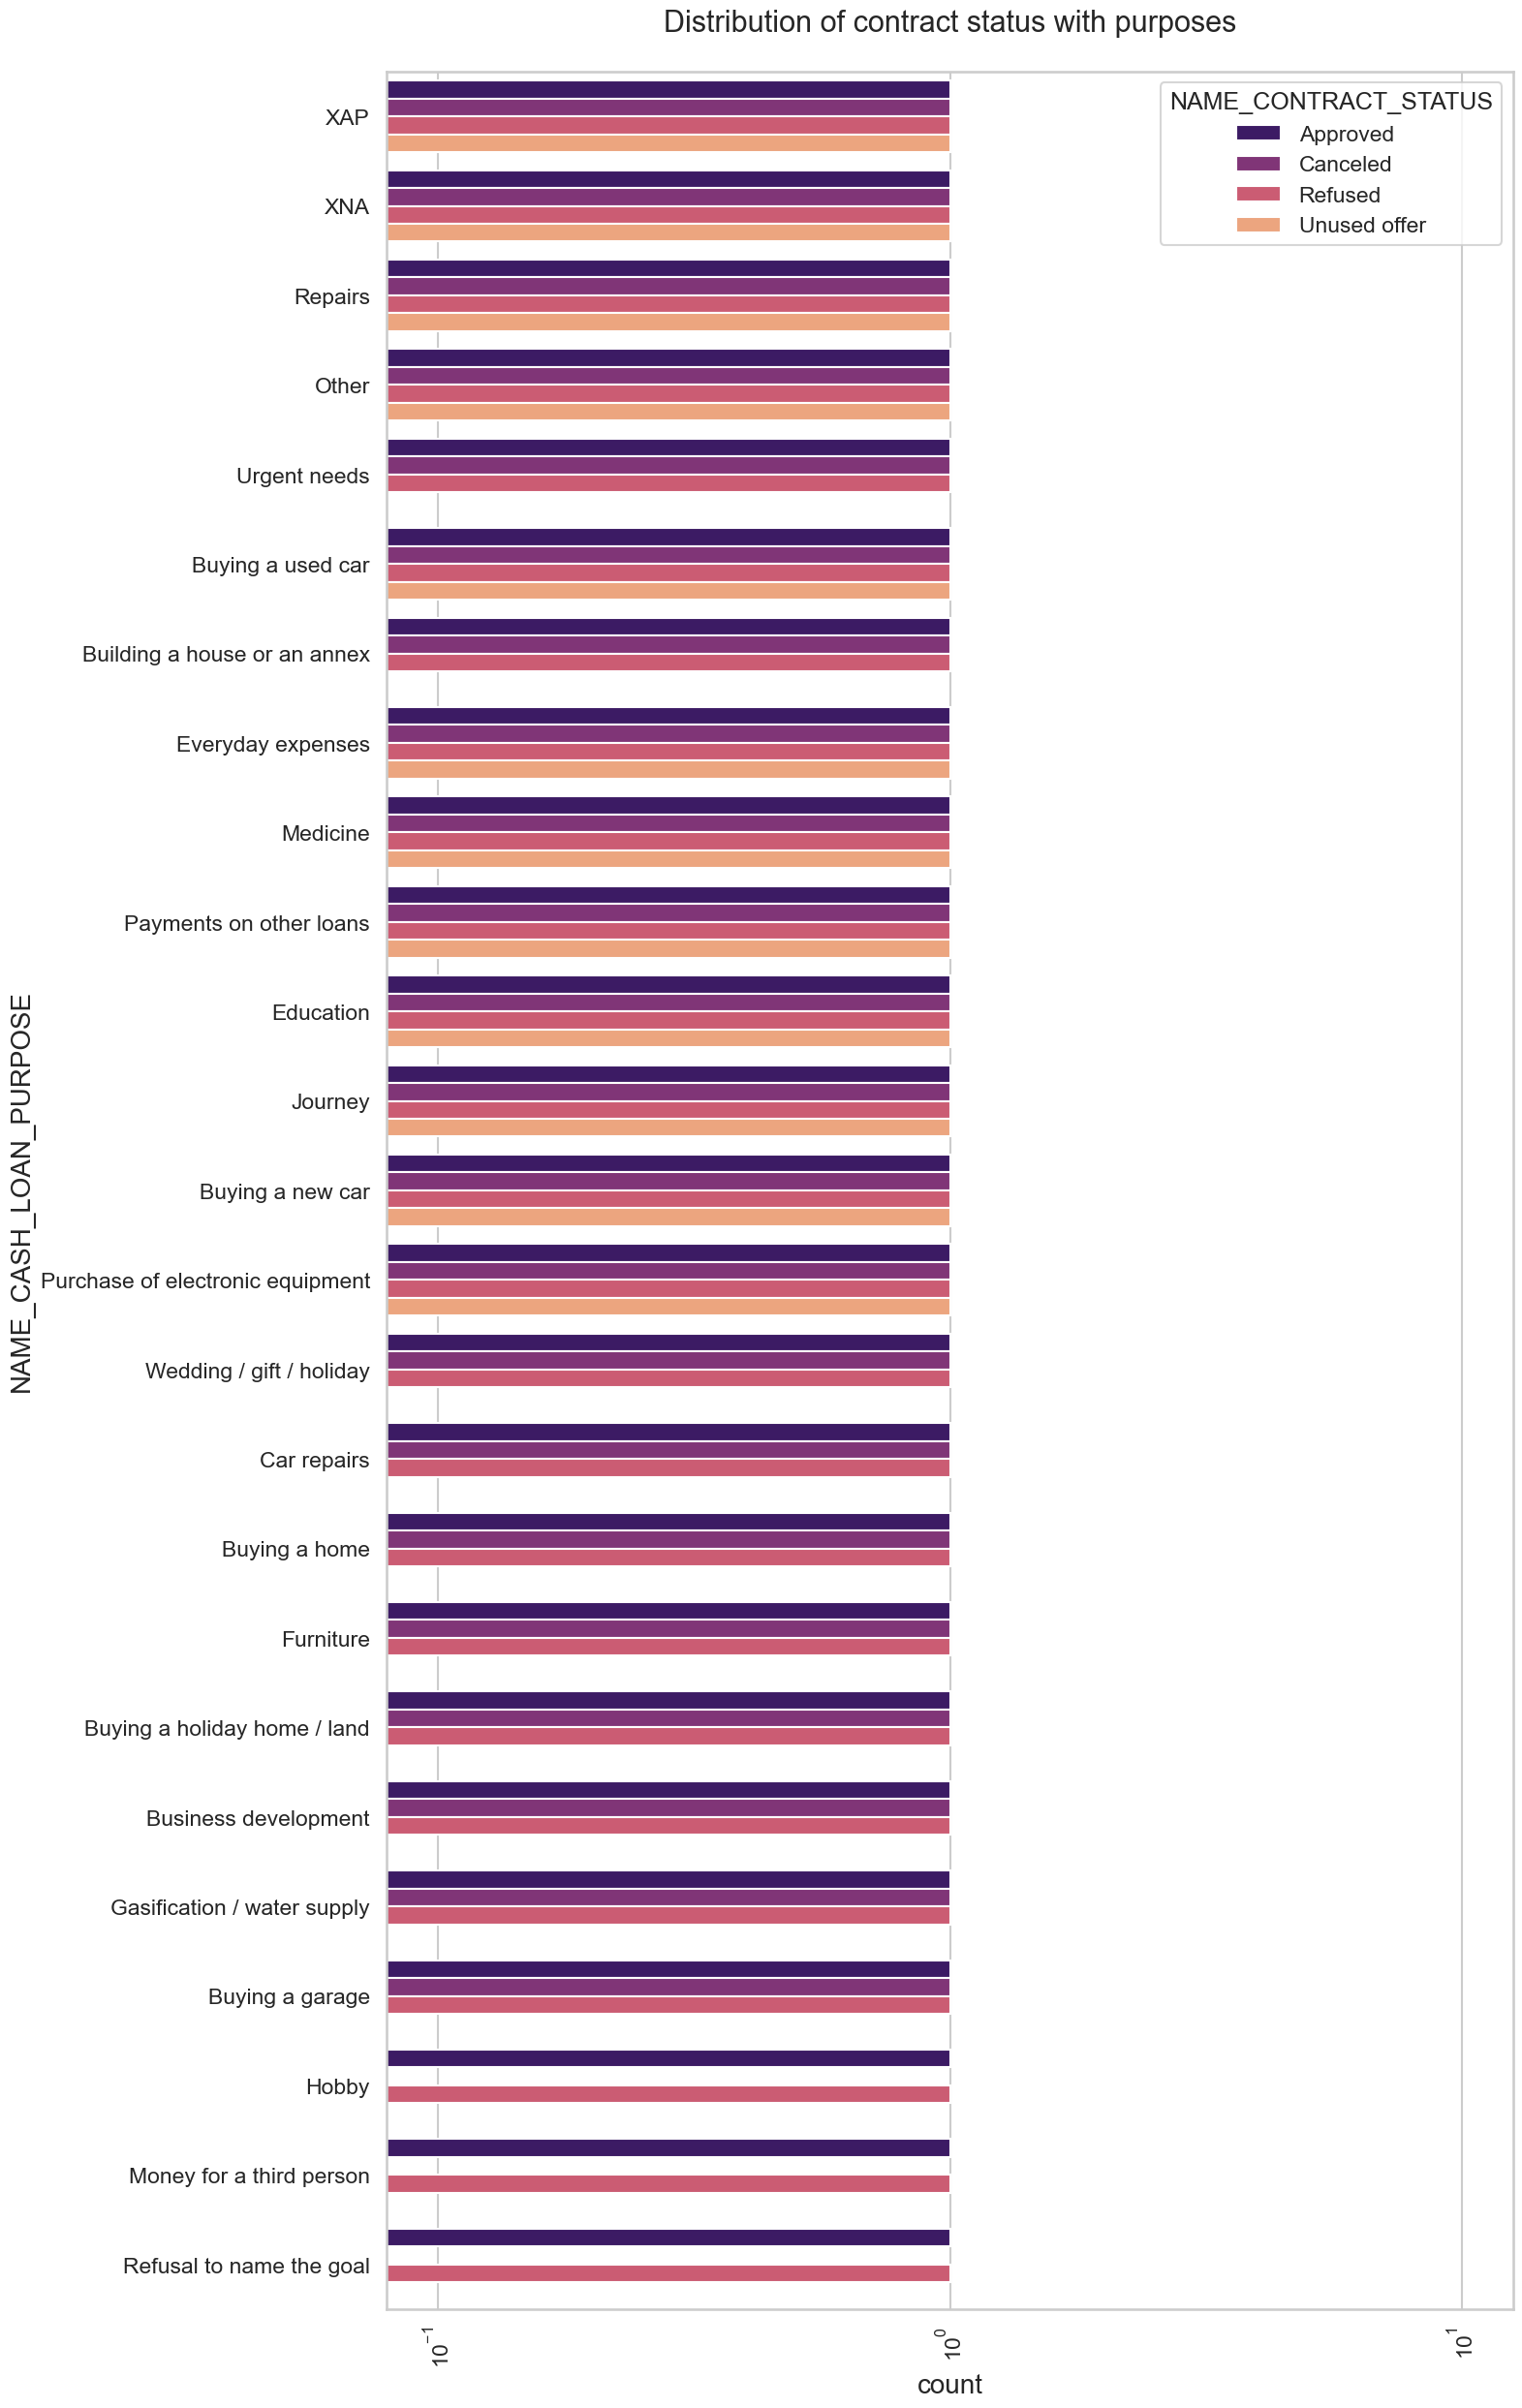

In [87]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = merge, y= 'NAME_CASH_LOAN_PURPOSE',
                   order=merge['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

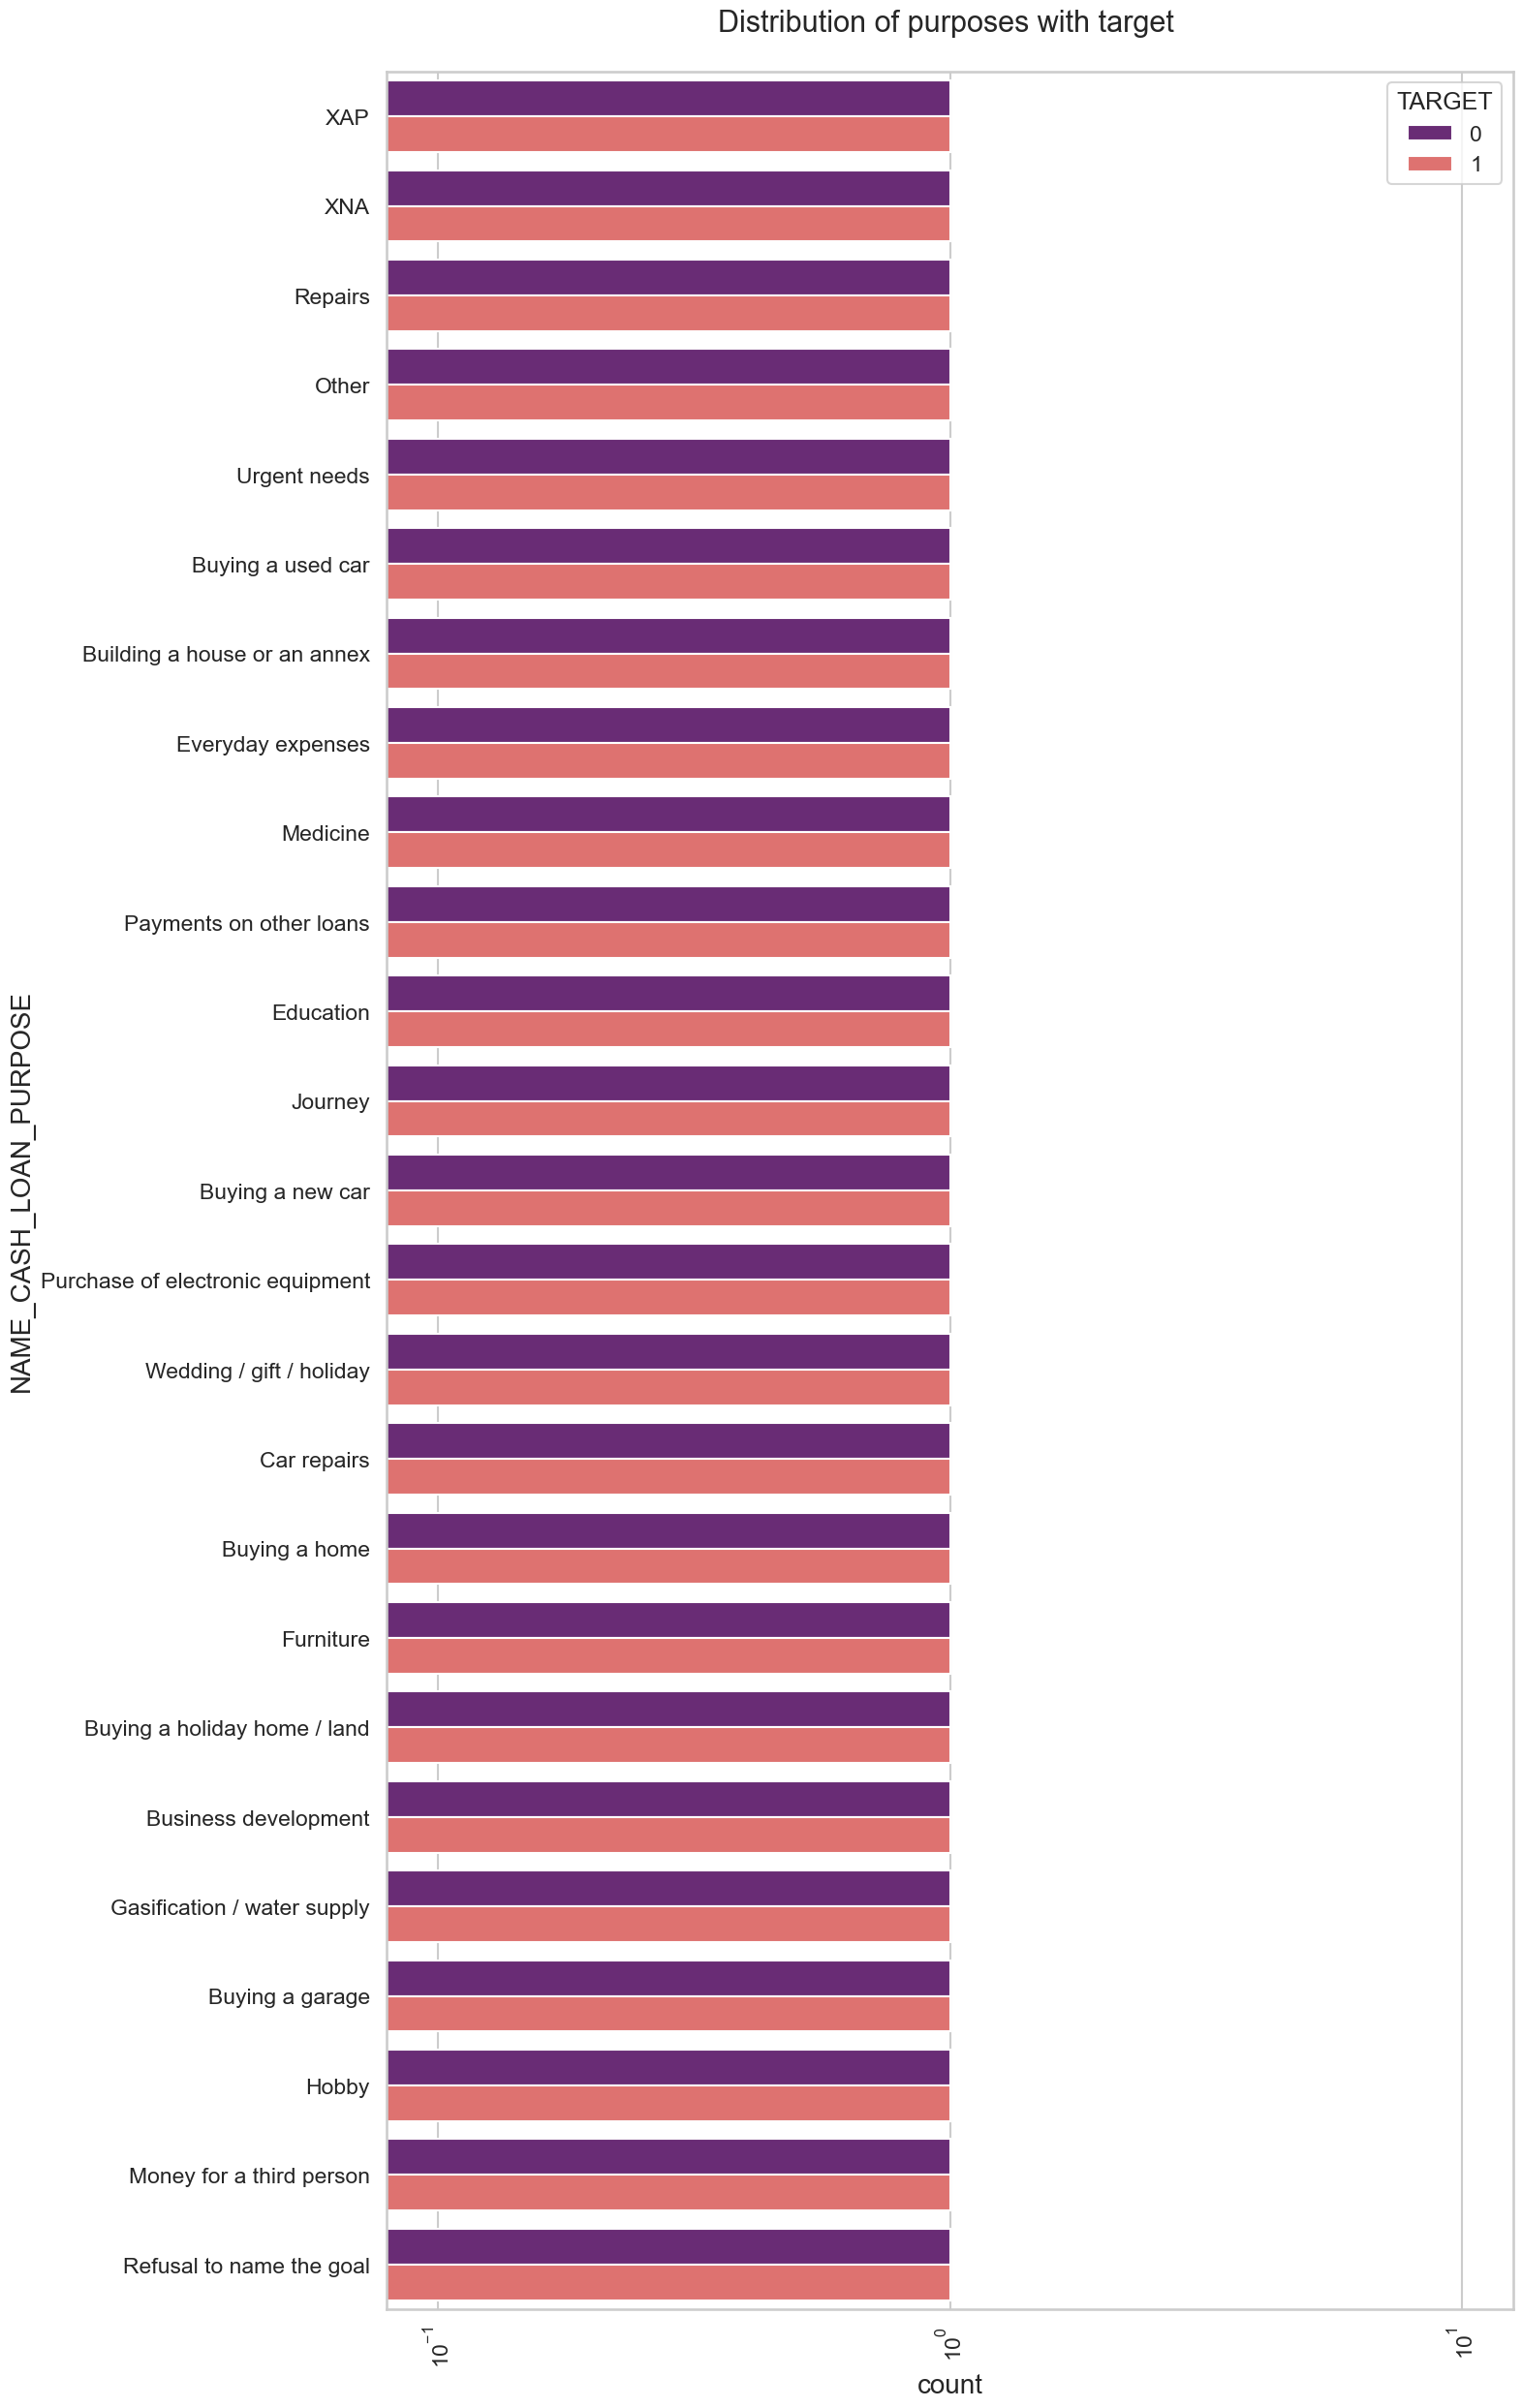

In [88]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = merge, y= 'NAME_CASH_LOAN_PURPOSE',
                   order=merge['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')

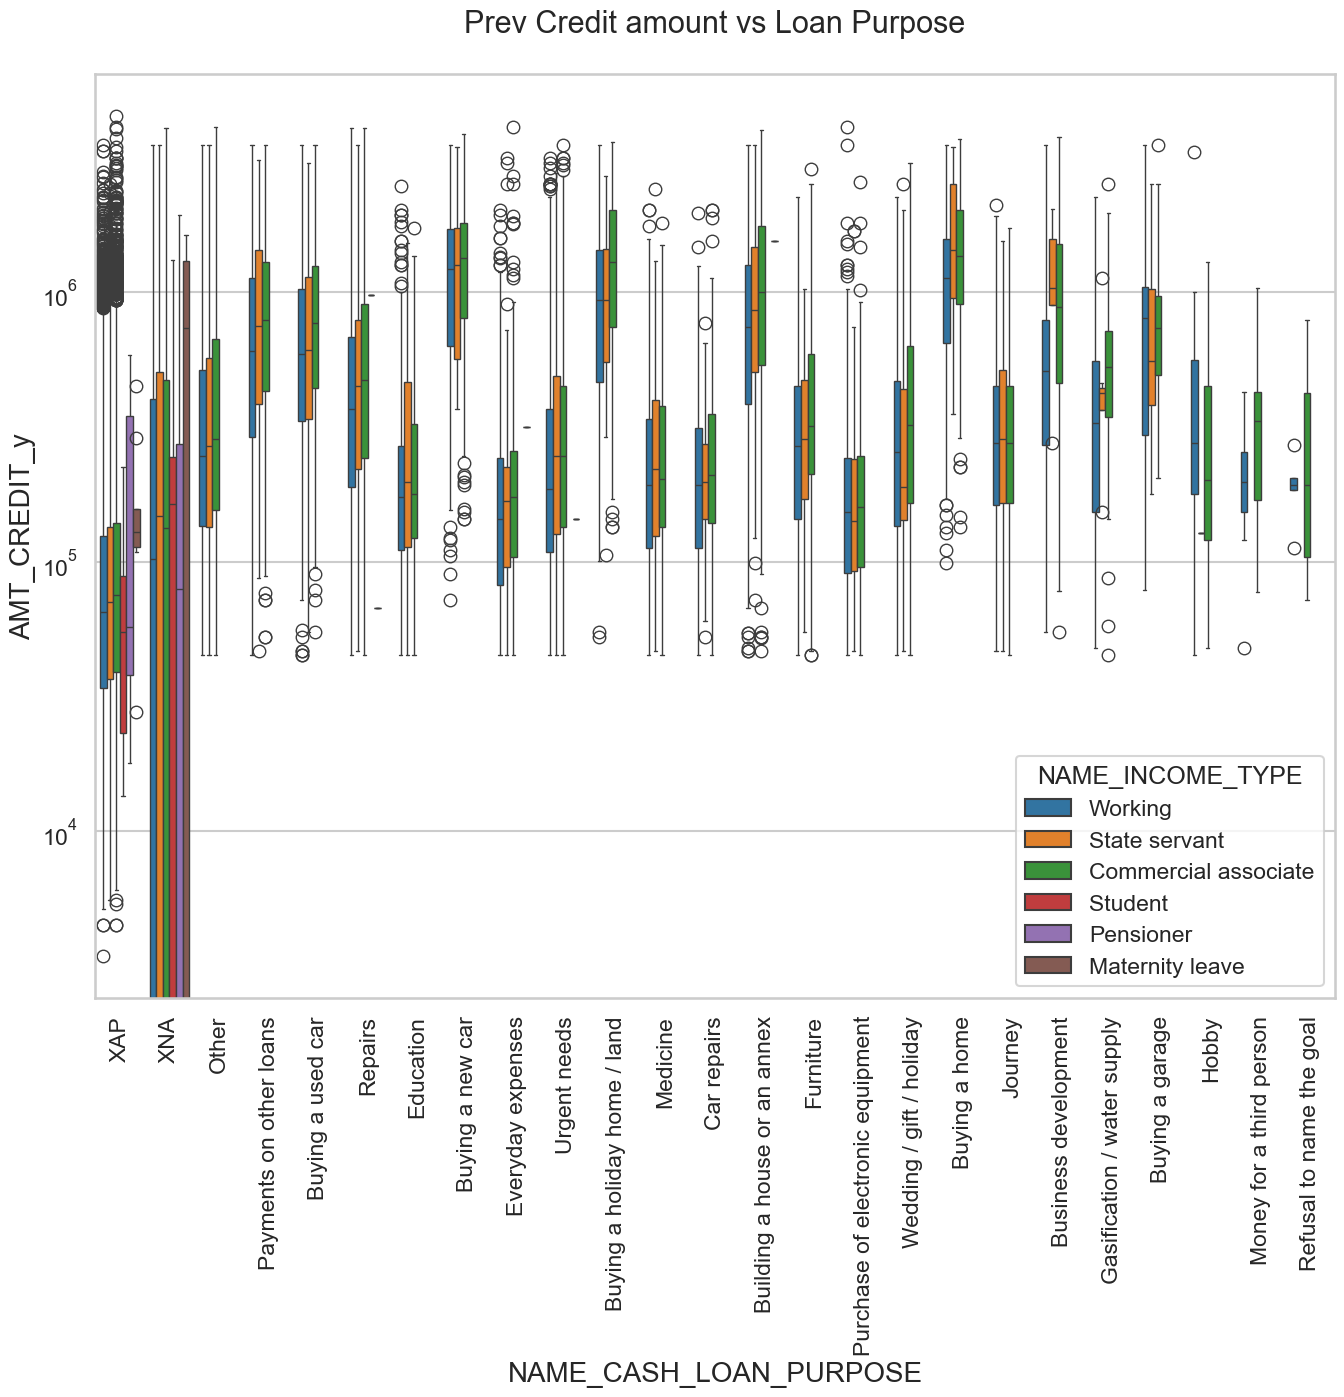

In [94]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data = merge, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_y',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

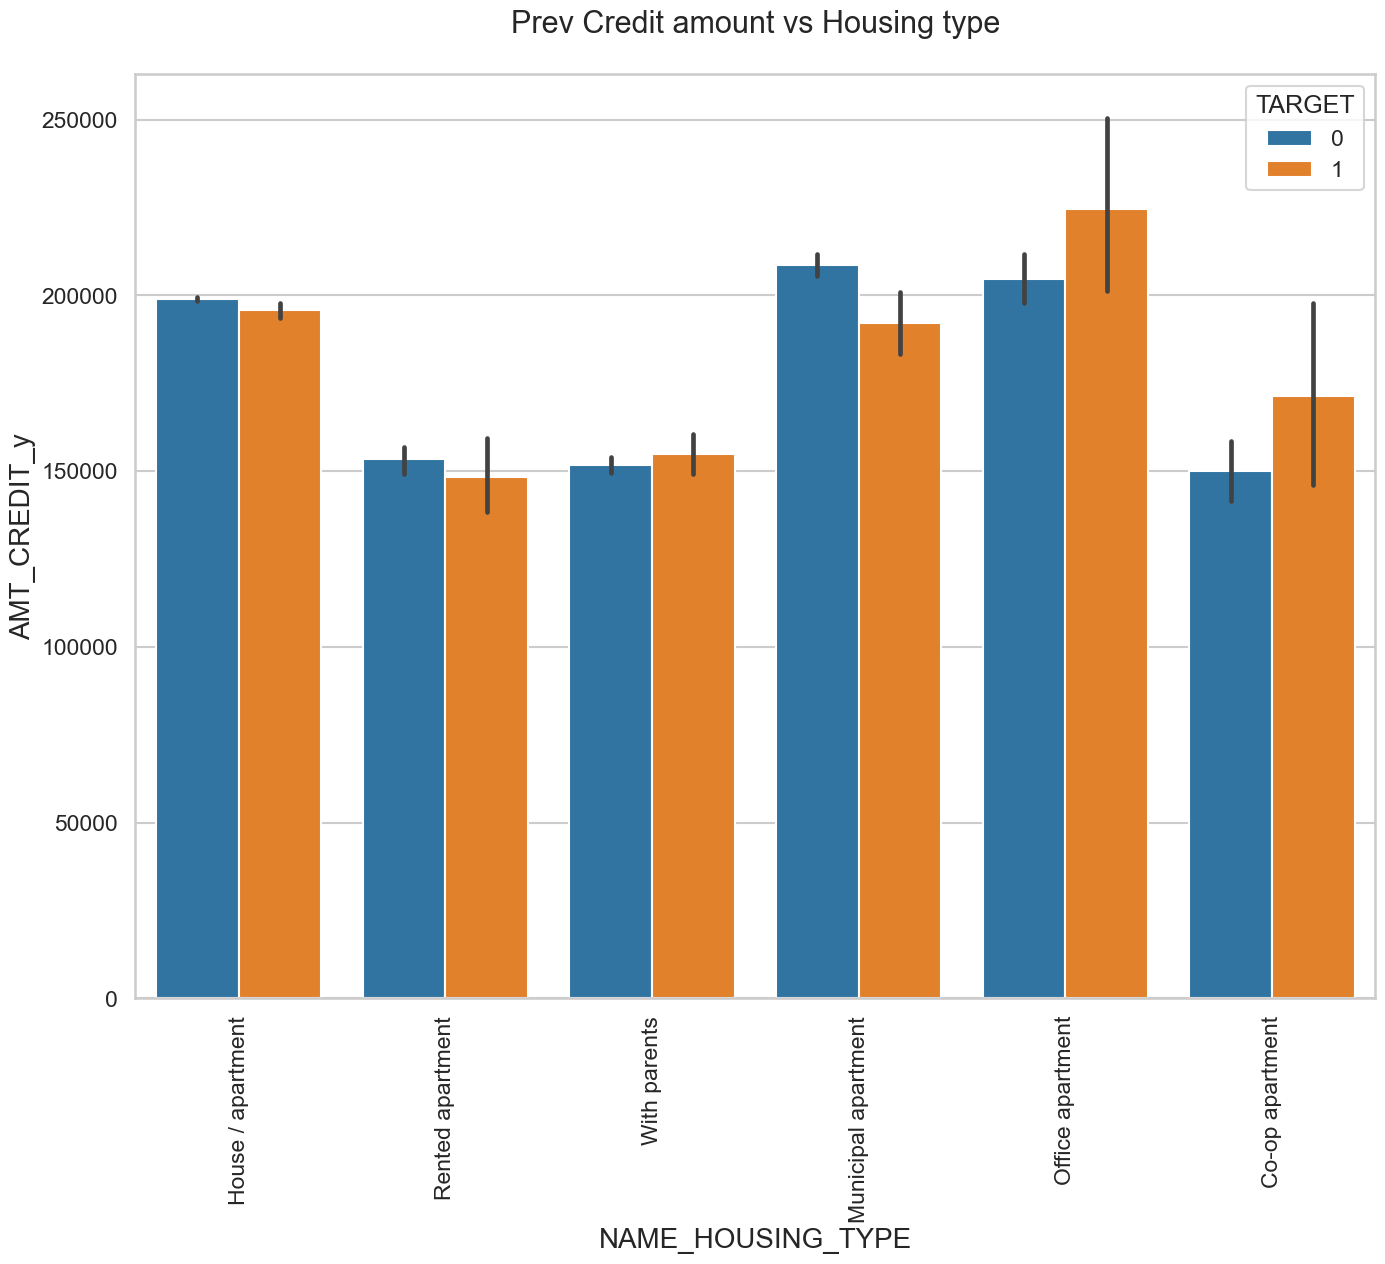

In [96]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =merge, y='AMT_CREDIT_y',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

In [97]:
merge.columns

Index(['SK_ID_CURR', 'TARGET', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE_x',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH',
       'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x',
       'HOUR_APPR_PROCESS_START_x', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE', 'AMT_ANNUITY_y', 'AMT_APPLIC